In [1]:
from utils_v1 import *
import pathlib
import cv2
import sys
import numpy as np
from icecream import ic
from src.dataset import Para, ParaDeforestationTime


In [2]:

dataset = ParaDeforestationTime()

In [3]:
label_mask = dataset.loadLabel()
ic(label_mask.shape)

ic| label_mask.shape: (17730, 9203)


(17730, 9203)

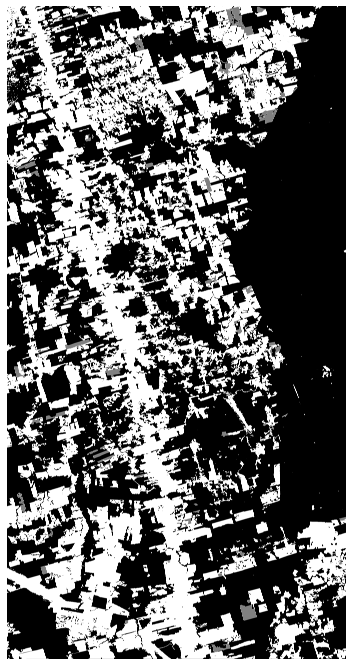

In [13]:
plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow(label_mask, cmap=plt.cm.gray)
plt.savefig('figures/' + dataset.__class__.__name__ + 'check_LabelMask.png',
        dpi = 150, bbox_inches = 'tight')
        

In [5]:
image_stack = dataset.loadInputImage()

ic| deforestation_time.dtype: dtype('float32')
    deforestation_time.shape: (17730, 9203, 1)
ic| np.unique(deforestation_time, return_counts=True): (array([0.        , 0.09090909, 0.18181819, 0.27272728, 0.36363637,
                                                              0.45454547, 0.54545456, 0.6363636 , 0.72727275, 0.8181819 ,
                                                              0.90909094, 1.        ], dtype=float32),
                                                        array([99530259,   644976,   956363,  1459696,  1561686,  2477971,
                                                               1299506,   903608,   864429,  4571354,  3150503, 45748839],
                                                             dtype=int64))
ic| image_stack.shape: (17730, 9203, 22)


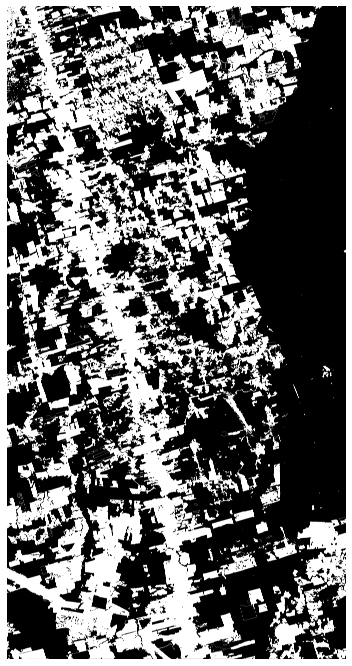

In [11]:
plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow(image_stack[...,0], cmap = plt.cm.gray)
plt.savefig('figures/' + dataset.__class__.__name__ + 'check_pastDeforestation.png',
        dpi = 150, bbox_inches = 'tight')

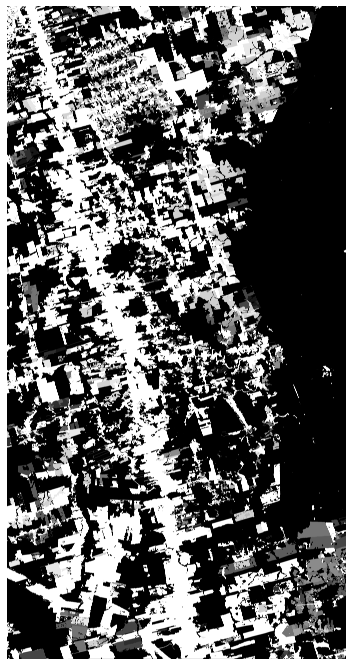

In [12]:
plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow(image_stack[...,1], cmap = plt.cm.gray)
plt.savefig('figures/' + dataset.__class__.__name__ + 'check_deforestationTime.png',
        dpi = 150, bbox_inches = 'tight')